In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

1. Preparing Data

In [ ]:
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])
sz = 10 # number of neruals in the hidden layer

In [ ]:
X = torch.tensor(X, dtype = torch.float)
Y = torch.tensor(Y, dtype = torch.float)

In [ ]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be fit
def func(x, A, B, C, D):
    return A * torch.cos(B * x) + C * x + D

# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

Xmean, Xstd  = X.mean(), X.std()
Ymean, Ystd  = Y.mean(), Y.std()

X = (X - Xmean) / Xstd
Y = (Y - Ymean) / Ystd

# Split the data into training and test sets
X_train, Y_train = X[:20], Y[:20]
X_test, Y_test = X[20:], Y[20:]

In [ ]:

# Convert data to PyTorch tensors
X_train_tensor = Variable(torch.Tensor(X_train).unsqueeze(1))
Y_train_tensor = Variable(torch.Tensor(Y_train).unsqueeze(1))
X_test_tensor = Variable(torch.Tensor(X_test).unsqueeze(1))
Y_test_tensor = Variable(torch.Tensor(Y_test).unsqueeze(1))

# Define the neural network model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
          nn.Linear(1, 1024),
          nn.ReLU(),
          nn.Linear(1024, 1)
        )

    def forward(self, x):
        x = self.layers(x)
        return x

# Create an instance of the model
net = Net()



# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Train the model
num_epochs = 10000
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = net(X_train_tensor.unsqueeze(1))
    loss = criterion(outputs, Y_train_tensor.unsqueeze(1))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute training and test loss for monitoring
    train_losses.append(loss.item())
    test_outputs = net(X_test_tensor.unsqueeze(1))
    test_loss = criterion(test_outputs, Y_test_tensor.unsqueeze(1))
    test_losses.append(test_loss.item())

    # Print progress
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    if (loss < 0.001):
      print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
      print('\nModel is not improving, so we halt the training session.')
      break



Epoch [1000/10000], Training Loss: 0.0023, Test Loss: 2.1553
Epoch [2000/10000], Training Loss: 0.0011, Test Loss: 1.8867
Epoch [2133/10000], Training Loss: 0.0010, Test Loss: 1.8422

Model is not improving, so we halt the training session.


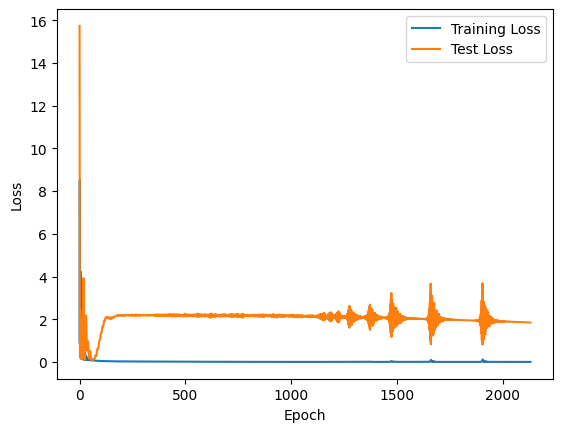

In [ ]:
# Plot the loss curve
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# # Evaluate the model on the full data range
# X_tensor = Variable(torch.Tensor(X_n))
# Y_pred = normal_process.inverse_transform(net(X_tensor).detach().numpy())

# print(Y_pred)
# # Plot the predicted curve
# plt.plot(X, Y, 'o', label='Data')
# plt.plot(X, Y_pred, label='Prediction')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

In [ ]:
print(X)

[-1.67705098 -1.56524758 -1.45344419 -1.34164079 -1.22983739 -1.11803399
 -1.00623059 -0.89442719 -0.78262379 -0.67082039 -0.55901699 -0.4472136
 -0.3354102  -0.2236068  -0.1118034   0.          0.1118034   0.2236068
  0.3354102   0.4472136   0.55901699  0.67082039  0.78262379  0.89442719
  1.00623059  1.11803399  1.22983739  1.34164079  1.45344419  1.56524758
  1.67705098]


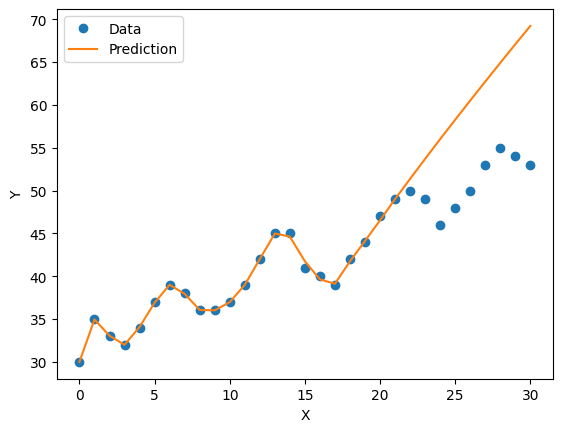

In [ ]:
# De-normalize the predicted output
X_tensor = Variable(torch.Tensor(X).unsqueeze(1))
Y_pred = net(X_tensor).detach().numpy()


# Plot the predicted curve with de-normalized data
plt.plot(X * Xstd + Xmean, Y * Ystd + Ymean, 'o', label='Data')
plt.plot(X * Xstd + Xmean, Y_pred * Ystd + Ymean, label='Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# Split the data into training and test sets
X_train, Y_train = X[:10], Y[:10]
X_test, Y_test = X[10:], Y[10:]

In [ ]:

# Convert data to PyTorch tensors
X_train_tensor = Variable(torch.Tensor(X_train).unsqueeze(1))
Y_train_tensor = Variable(torch.Tensor(Y_train).unsqueeze(1))
X_test_tensor = Variable(torch.Tensor(X_test).unsqueeze(1))
Y_test_tensor = Variable(torch.Tensor(Y_test).unsqueeze(1))

# Define the neural network model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
          nn.Linear(1, 1024),
          nn.ReLU(),
          nn.Linear(1024, 1)
        )

    def forward(self, x):
        x = self.layers(x)
        return x

# Create an instance of the model
net = Net()



# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Train the model
num_epochs = 10000
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = net(X_train_tensor.unsqueeze(1))
    loss = criterion(outputs, Y_train_tensor.unsqueeze(1))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute training and test loss for monitoring
    train_losses.append(loss.item())
    test_outputs = net(X_test_tensor.unsqueeze(1))
    test_loss = criterion(test_outputs, Y_test_tensor.unsqueeze(1))
    test_losses.append(test_loss.item())

    # Print progress
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    if (loss < 0.001):
      print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
      print('\nModel is not improving, so we halt the training session.')
      break



Epoch [901/10000], Training Loss: 0.0010, Test Loss: 6.8505

Model is not improving, so we halt the training session.


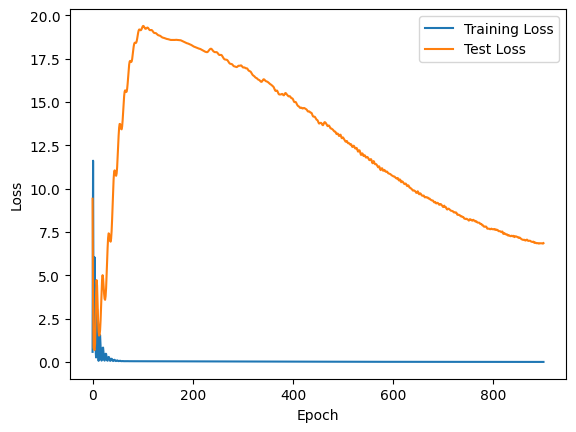

In [ ]:
# Plot the loss curve
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# # Evaluate the model on the full data range
# X_tensor = Variable(torch.Tensor(X_n))
# Y_pred = normal_process.inverse_transform(net(X_tensor).detach().numpy())

# print(Y_pred)
# # Plot the predicted curve
# plt.plot(X, Y, 'o', label='Data')
# plt.plot(X, Y_pred, label='Prediction')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

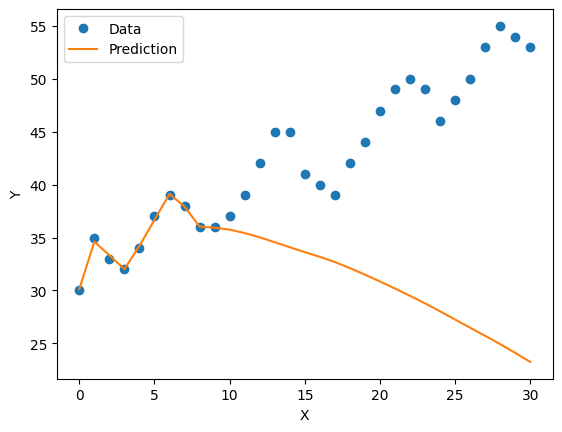

In [ ]:
# De-normalize the predicted output
X_tensor = Variable(torch.Tensor(X).unsqueeze(1))
Y_pred = net(X_tensor).detach().numpy()


# Plot the predicted curve with de-normalized data
plt.plot(X * Xstd + Xmean, Y * Ystd + Ymean, 'o', label='Data')
plt.plot(X * Xstd + Xmean, Y_pred * Ystd + Ymean, label='Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()